<a href="https://colab.research.google.com/github/Abdel-Moussaoui/GAN-Master/blob/master/AutoEncoder1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* We'll start simple, with a single fully-connected neural layer as encoder and as decoder:



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


* Let's also create a separate encoder model:

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

* As well as the decoder model:

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



* Now let's train our autoencoder to reconstruct MNIST digits.

* First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

* Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

* We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


* Now let's train our autoencoder for 50 epochs:

In [14]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3641 - val_loss: 0.2708
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2627 - val_loss: 0.2507
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2401 - val_loss: 0.2276
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2202 - val_loss: 0.2106
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2056 - val_loss: 0.1981
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1949 - val_loss: 0.1890
Epoch 7/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1869 - val_loss: 0.1819
Epoch 8/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1805 - val_loss: 0.1761
Epoch 9/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1749 - val_loss: 0.1709
Epoch

* After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

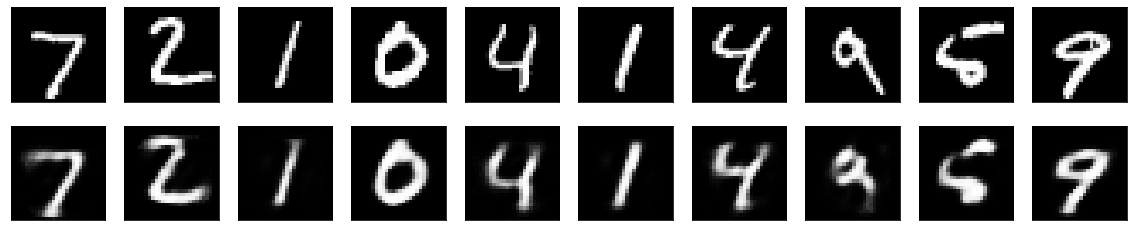

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()